# Music Recommendation System

# Author: Dimple Kaushik

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Reading the dataset

Data Description:
Describing the dataset provided for the challenge such as different data sources,listening histories, song features, and many other additional information available.Also Providing details on the size of the dataset, the number of users and songs, 
and then performing the data preprocessing steps.

In [3]:
members=pd.read_csv(r"D:\LGM\music\members.csv")
members

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


In [4]:
songs=pd.read_csv("D:\LGM\music\songs.csv",nrows=20000)
songs

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
19995,XTDNdQR/VbqECrUmXlmyeOnhD4dFglDefCw/auQ/mrU=,363946,958,Rachel Podger,Heinrich Ignaz Franz von Biber,NaN,-1.0
19996,iUWEK/CODxzJtYSPUIp/0SM5yUd8RBrAZeCPwJFu/+c=,319712,958,Various Artists,Johann Sebastian Bach,NaN,-1.0
19997,ljBHnpgdxRnzxO0IJoiwVZdjlDZEUgjOvvVhLKCxwNY=,214274,958,Mozart,NaN,NaN,-1.0
19998,OOowMAm1BHvDzH0xt33+heZkV2lnWK2sffo9kugb9zU=,223425,465,Jorge Ben Jor,Jorge Ben Jor,NaN,52.0


In [5]:
songs_info=pd.read_csv(r"D:\LGM\music\song_extra_info.csv")
songs_info

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
2295966,hLnetpF6UbPg28sSfXnPE2vsdaGsLvddlXEdJR4VTIA=,Deep Breathing,PLL431720793
2295967,N+6vJ8actKQm0S3Fpf4elipTjoAo9ev28aA5FJN5e40=,In Hiding,US5UL1519827
2295968,pv35uG0ts05mWtirM/AMOWEzbHxIVart5ZzRXqKUY1c=,Il Est Ne Le Divin Enfant,PLL431502294
2295969,QSySnm8jt2Go7byY34/PxsZP6dPCins2j2cyYquNhBo=,The Exodus Song,DEPZ69316095


In [6]:
submission=pd.read_csv(r"D:\LGM\music\sample_submission.csv",nrows=20000)
submission

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
19995,19995,0.5
19996,19996,0.5
19997,19997,0.5
19998,19998,0.5


In [7]:
train_data=pd.read_csv(r"D:\LGM\music\train.csv",nrows=20000)
train_data

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
19995,N9u0iiKsqZYNdmI12834pcyIc7xkifUUHyrb69T0jaU=,NGGXOVTfxaeWP5FCG4FqEXThMN5oArLN3V6gG/XFBnY=,my library,Local playlist more,local-library,0
19996,N9u0iiKsqZYNdmI12834pcyIc7xkifUUHyrb69T0jaU=,KVcvULyaMxyWdn3ywjZifiGJqkaT6uUKMBLZ+BTsB7Q=,my library,Local playlist more,local-library,0
19997,N9u0iiKsqZYNdmI12834pcyIc7xkifUUHyrb69T0jaU=,+ns7TUfsDgumML8q2hVjpi+B3dDLB/YlrEDoLuSmlKI=,my library,Local playlist more,local-library,0
19998,N9u0iiKsqZYNdmI12834pcyIc7xkifUUHyrb69T0jaU=,xf3Py8deCPXun3qc83fyceiXCJ/qZw7pfHxD1x3SvgY=,my library,Local playlist more,local-library,1


In [8]:
test_data=pd.read_csv(r"D:\LGM\music\test.csv",nrows=20000)
test_data

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
...,...,...,...,...,...,...
19995,19995,g2ZIsHl2Mheh31zqY9cbgx9MKizUzskgEcYUBhuExys=,F/zl2VkHgQs+Lx+XjS74XN1m59vNAVir/Sl11wc8Fr4=,my library,Local playlist more,local-library
19996,19996,g2ZIsHl2Mheh31zqY9cbgx9MKizUzskgEcYUBhuExys=,vM08WBQRO9eZo1K+qTJmjuw2IqbuA3L65ojbGwB4GI0=,my library,Local playlist more,local-library
19997,19997,g2ZIsHl2Mheh31zqY9cbgx9MKizUzskgEcYUBhuExys=,61cwHmq3kaaSf/yMvcEXUeGmPyG1g8gY7am/0fuECBw=,my library,Local playlist more,local-library
19998,19998,g2ZIsHl2Mheh31zqY9cbgx9MKizUzskgEcYUBhuExys=,icCxTviW2hBsVijNHZnddwcjvVi+PE7ywBQEPidLt/4=,my library,Local playlist more,local-library


In [9]:
print(f"The songs_data has {songs.shape[0]} rows and {songs.shape[1]} columns")
print(f"The songs_extra_info_data  has {songs_info.shape[0]} rows and {songs_info.shape[1]} columns")
print(f"The members_data has {members.shape[0]} rows and {members.shape[1]} columns")
print(f"The sample_submission_data  has {submission.shape[0]} rows and {submission.shape[1]} columns")
print(f"The train_data has {train_data.shape[0]} rows and {train_data.shape[1]} columns")
print(f"The test_data has {test_data.shape[0]} rows and {test_data.shape[1]} columns")

The songs_data has 20000 rows and 7 columns
The songs_extra_info_data  has 2295971 rows and 3 columns
The members_data has 34403 rows and 7 columns
The sample_submission_data  has 20000 rows and 2 columns
The train_data has 20000 rows and 6 columns
The test_data has 20000 rows and 6 columns


In [10]:
songs.describe()

,song_length,language
count,2.000000e+04,20000.000000
mean,2.456958e+05,25.946550
std,1.201716e+05,23.223231
min,4.922000e+03,-1.000000
25%,1.997060e+05,3.000000
50%,2.336850e+05,17.000000
75%,2.731360e+05,52.000000
max,4.025318e+06,59.000000


In [11]:
print("Columns present in the Songs data are:")
for columns in songs.columns:
    print(columns)

Columns present in the Songs data are:
song_id
song_length
genre_ids
artist_name
composer
lyricist
language


In [12]:
print(f"Number of records : {songs.shape[0]}")
print(f"Count of distinct song lengths : {len(songs.song_length.unique())}")
print(f"Count of distinct genre ids : {len(songs.genre_ids.unique())}")
print(f"Count of distinct artist name : {len(songs.artist_name.unique())}")
print(f"Count of distinct composer : {len(songs.composer.unique())}")
print(f"Count of distinct lyricist : {len(songs.lyricist.unique())}")
print(f"Count of distinct languages : {len(songs.language.unique())}")

Number of records : 20000
Count of distinct song lengths : 10734
Count of distinct genre ids : 275
Count of distinct artist name : 8378
Count of distinct composer : 8332
Count of distinct lyricist : 3977
Count of distinct languages : 10


# Data preprocessing

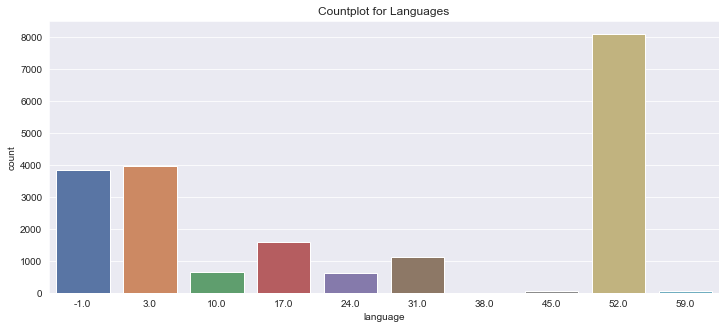

In [13]:
plt.figure(figsize = (12, 5))
sns.set_style("darkgrid")
ax = sns.countplot(x = songs.language, data = songs.language, palette="deep")
ax.set_title("Countplot for Languages")
plt.show()

In [14]:
print("Columns present in the Members Data are:")
for columns in members.columns:
    print(columns)

Columns present in the Members Data are:
msno
city
bd
gender
registered_via
registration_init_time
expiration_date


Text(0.5, 1.0, 'Count plot for gender')

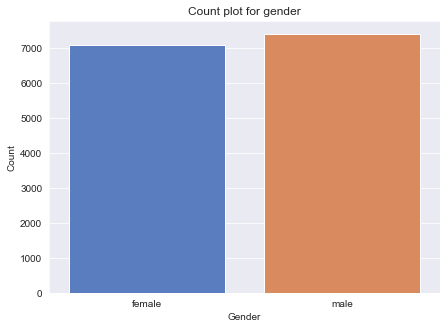

In [15]:
plt.figure(figsize=(7,5))
sns.countplot(x='gender', data=members, palette = "muted")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count plot for gender')

Text(0.5, 1.0, 'Count plot for Registation Method')

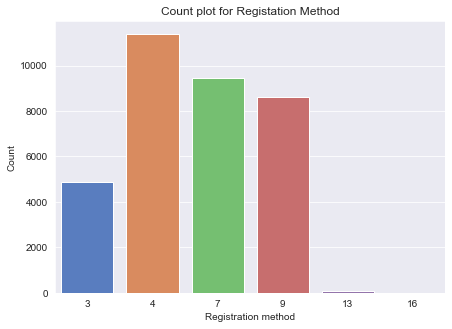

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(x='registered_via', data=members, palette = "muted")
plt.xlabel('Registration method')
plt.ylabel('Count')
plt.title('Count plot for Registation Method')

In [17]:
print(f"Total number of records : {train_data.shape[0]}")

Total number of records : 20000


Text(0.5, 1.0, 'Count plot for system tab there are using')

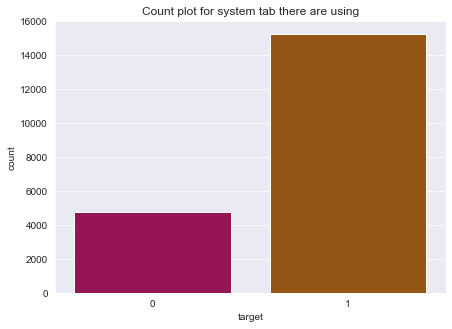

In [18]:
plt.figure(figsize=(7,5))
sns.countplot(x='target',data = train_data, palette = 'brg')
plt.xlabel('target')
plt.ylabel('count')
plt.title('Count plot for system tab there are using')

In [19]:
print("Total percentage for NaN value in target column  : ",(train_data["target"].isna().sum()/len(train_data["target"]))*100,"%")

Total percentage for NaN value in target column  :  0.0 %


In [20]:
duplicate_values1 = len(train_data["song_id"])-train_data["song_id"].nunique()
print("Total no of duplicate song id         : ", duplicate_values1)
print("Total percentage of duplicate song id : ", (duplicate_values1/len(train_data["song_id"]))*100,"%")

Total no of duplicate song id         :  10187
Total percentage of duplicate song id :  50.934999999999995 %


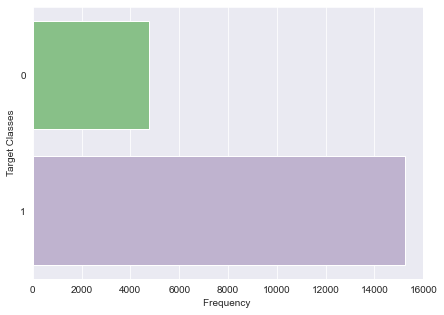

In [21]:
plt.figure(figsize=(7,5))
sns.countplot(y=train_data['target'],data=train_data, palette = 'Accent')
plt.ylabel('Target Classes')
plt.xlabel('Frequency ')
plt.show()

In [22]:
songs_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [23]:
songs_info.isnull().sum()

song_id         0
name            3
isrc       136548
dtype: int64

In [24]:
songs.isnull().sum()

song_id            0
song_length        0
genre_ids        346
artist_name        0
composer        8382
lyricist       14332
language           0
dtype: int64

In [25]:
songs['genre_ids'].fillna(' ',inplace=True)
songs['composer'].fillna(' ',inplace=True)
songs['lyricist'].fillna(' ',inplace=True)
songs['language'].fillna((52.0),inplace=True)

In [26]:
songs.isnull().sum()

song_id        0
song_length    0
genre_ids      0
artist_name    0
composer       0
lyricist       0
language       0
dtype: int64

In [27]:
train_data.isnull().sum()

msno                    0
song_id                 0
source_system_tab      67
source_screen_name    576
source_type            50
target                  0
dtype: int64

In [28]:
train_data=train_data.drop(['source_system_tab','source_screen_name','source_type'],axis=1)
train_data.head()

,msno,song_id,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1


In [29]:
train_data.rename(columns={'msno':'user_id'},inplace=True)
train_data.head()

,user_id,song_id,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1


In [30]:
train_data.shape

(20000, 3)

In [31]:
df=train_data.merge(songs,on='song_id')

In [32]:
df=df.drop(['song_length','language'],axis=1)
df.head()

,user_id,song_id,target,genre_ids,artist_name,composer,lyricist
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩


In [33]:
df=df.merge(songs_info,on='song_id').drop('isrc',axis=1)
df.head()

,user_id,song_id,target,genre_ids,artist_name,composer,lyricist,name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好


In [34]:
df.rename(columns={'name':'song_name'},inplace=True)
df.head()

,user_id,song_id,target,genre_ids,artist_name,composer,lyricist,song_name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好


# Data Cleaning

In [35]:
df['genre_ids'].value_counts()

genre_ids
465                    710
458                    400
444                     65
1609                    57
921                     49
359                     32
                        26
139                     24
2022                    21
1259                    20
2122                    13
139|125|109              7
726                      7
451                      7
437                      7
958                      6
786|947                  6
465|1259                 4
1011                     4
786                      4
947                      4
691                      3
921|465                  3
430                      3
921|458                  2
458|1287                 2
698                      2
444|1259                 2
829                      2
850                      2
1152                     1
880|458                  1
465|829                  1
864|857|850|843          1
465|798                  1
474                      1
864|850|726|857|84

In [36]:
df['genre_ids']=df['genre_ids'].str.replace('|',' ',regex=True)
df['genre_ids'].value_counts()

genre_ids
 4 6 5                                     710
 4 5 8                                     400
 4 4 4                                      65
 1 6 0 9                                    57
 9 2 1                                      49
 3 5 9                                      32
                                            26
 1 3 9                                      24
 2 0 2 2                                    21
 1 2 5 9                                    20
 2 1 2 2                                    13
 1 3 9 | 1 2 5 | 1 0 9                       7
 7 2 6                                       7
 4 5 1                                       7
 4 3 7                                       7
 9 5 8                                       6
 7 8 6 | 9 4 7                               6
 4 6 5 | 1 2 5 9                             4
 1 0 1 1                                     4
 7 8 6                                       4
 9 4 7                                       4
 6 

In [37]:
df['artist_name']= df['artist_name'].str.replace('|',' ',regex=True)
df['composer']= df['composer'].str.replace('/',' ',regex=True)
df['lyricist']= df['lyricist'].str.replace('/',' ',regex=True)
df['artist_name']=df['artist_name'].str.lower()
df['composer']=df['composer'].str.lower()
df['lyricist']=df['lyricist'].str.lower()

In [38]:
df['songs_details']=df['artist_name']+''+df['composer']+df['lyricist']
df.head()

,user_id,song_id,target,genre_ids,artist_name,composer,lyricist,song_name,songs_details
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1 2 5 9,d e s i i g n e r,sidney selby| adnan khan,,Panda,d e s i i g n e r sidney selby| adnan khan
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1 2 5 9,d e s i i g n e r,sidney selby| adnan khan,,Panda,d e s i i g n e r sidney selby| adnan khan
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,4 5 8,莊 心 妍,鄭建浩,鄭建浩,我過的很好,莊 心 妍 鄭建浩鄭建浩
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,4 5 8,莊 心 妍,鄭建浩,鄭建浩,我過的很好,莊 心 妍 鄭建浩鄭建浩
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,4 5 8,莊 心 妍,鄭建浩,鄭建浩,我過的很好,莊 心 妍 鄭建浩鄭建浩


In [39]:
df.user_id.value_counts()

user_id
EozJegFxTFIWDb9aJ7O8kSUHAgx4ZIvqf7IuN5Zck50=    19
V5U4EGk2kaSKaUGSwhU6g3HBefxflEvAy1vWPu6UBQs=    18
Bwg9yS76qujJJeKsYSzfJrMlkjK5Ui7KFkgUcjuXRCg=    12
W9NYSCff57nmfyYCiX6IbW0/G3YuwC18h/rld+BGxMY=    11
UzlQoa9tdrcpYdh4wksoh+SpWCFcKvRGPA+xLNqghmo=    11
                                                ..
rb7TT328utsdnd8COyhstig0zciXIURo7M464E60EHg=     1
hSn7jMfIURFu+1W3PDIDTxbhM5SxRg9VFRoH23Rm2Ic=     1
yrMfQXudhDaA/bOePZtkKErbjZc5pALG79FHPayEy5U=     1
iP3eF1In0rH61CfgVmWVYj4CgFcQQ0iVZG7MBA+Plgo=     1
j2Sx5B7BrjqCiT3ZwWK4AvepwM14QEalhTPi2/sgdG4=     1
Name: count, Length: 975, dtype: int64

In [40]:
df.duplicated().sum()

0

In [41]:
#Creating a copy file before performing similarity
main_df=df.copy()
main_df.head()

,user_id,song_id,target,genre_ids,artist_name,composer,lyricist,song_name,songs_details
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1 2 5 9,d e s i i g n e r,sidney selby| adnan khan,,Panda,d e s i i g n e r sidney selby| adnan khan
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1 2 5 9,d e s i i g n e r,sidney selby| adnan khan,,Panda,d e s i i g n e r sidney selby| adnan khan
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,4 5 8,莊 心 妍,鄭建浩,鄭建浩,我過的很好,莊 心 妍 鄭建浩鄭建浩
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,4 5 8,莊 心 妍,鄭建浩,鄭建浩,我過的很好,莊 心 妍 鄭建浩鄭建浩
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,4 5 8,莊 心 妍,鄭建浩,鄭建浩,我過的很好,莊 心 妍 鄭建浩鄭建浩


In [42]:
main_df.songs_details.duplicated().sum()

889

In [43]:
main_df.shape

(1509, 9)

In [44]:
main_df.duplicated().sum()

0

In [45]:
main_df=main_df.drop(['user_id'],axis=1)

In [46]:
main_df

,song_id,target,genre_ids,artist_name,composer,lyricist,song_name,songs_details
0,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1 2 5 9,d e s i i g n e r,sidney selby| adnan khan,,Panda,d e s i i g n e r sidney selby| adnan khan
1,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1 2 5 9,d e s i i g n e r,sidney selby| adnan khan,,Panda,d e s i i g n e r sidney selby| adnan khan
2,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,4 5 8,莊 心 妍,鄭建浩,鄭建浩,我過的很好,莊 心 妍 鄭建浩鄭建浩
3,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,4 5 8,莊 心 妍,鄭建浩,鄭建浩,我過的很好,莊 心 妍 鄭建浩鄭建浩
4,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,4 5 8,莊 心 妍,鄭建浩,鄭建浩,我過的很好,莊 心 妍 鄭建浩鄭建浩
...,...,...,...,...,...,...,...,...
1504,gtenKB6Uz9z5MnC8GIvaDSyW+6m6JhmgRBoFc/Jin2U=,1,4 6 5,v a r i o u s a r t i s t s,jung joonil,jung joonil,Fine Day,v a r i o u s a r t i s t s jung jooniljung...
1505,7kGd6s2v5YwI4fsESa10llGKkGE+V0QtWGhwiwNTPao=,1,4 6 5,郭 靜 ( c l a i r e k u o ),木蘭號aka陳韋伶,木蘭號aka陳韋伶,我不是你的那首情歌,郭 靜 ( c l a i r e k u o ) 木蘭號aka陳韋伶木蘭號aka陳韋伶
1506,ceQpMUI3zi3wbvUuwa2gcOzzvCv6QoagUpKHU9dwJQU=,1,4 6 5,曾 沛 慈 ( p e t s t s e n g ),梁正,葛大為+梁正,這裡還有我,曾 沛 慈 ( p e t s t s e n g ) 梁正葛大為+梁正
1507,Ny0HzjYum9lyotgPXzdRrcXhx20sFbpdSW68VRvtGfQ=,1,4 6 5,郭 靜 ( c l a i r e k u o ),陳小霞,姚若龍,在樹上唱歌,郭 靜 ( c l a i r e k u o ) 陳小霞姚若龍


In [47]:
main_df.duplicated().sum()

715

In [48]:
main_df=main_df.drop_duplicates()
main_df

,song_id,target,genre_ids,artist_name,composer,lyricist,song_name,songs_details
0,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1 2 5 9,d e s i i g n e r,sidney selby| adnan khan,,Panda,d e s i i g n e r sidney selby| adnan khan
2,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,4 5 8,莊 心 妍,鄭建浩,鄭建浩,我過的很好,莊 心 妍 鄭建浩鄭建浩
4,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,4 5 8,莊 心 妍,鄭建浩,鄭建浩,我過的很好,莊 心 妍 鄭建浩鄭建浩
21,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,1,4 5 8,周 湯 豪 ( n i c k t h e r e a l ),周湯豪,周湯豪\崔惟楷,帥到分手,周 湯 豪 ( n i c k t h e r e a l ) 周湯豪周湯豪\崔惟楷
73,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,0,4 5 8,周 湯 豪 ( n i c k t h e r e a l ),周湯豪,周湯豪\崔惟楷,帥到分手,周 湯 豪 ( n i c k t h e r e a l ) 周湯豪周湯豪\崔惟楷
...,...,...,...,...,...,...,...,...
1504,gtenKB6Uz9z5MnC8GIvaDSyW+6m6JhmgRBoFc/Jin2U=,1,4 6 5,v a r i o u s a r t i s t s,jung joonil,jung joonil,Fine Day,v a r i o u s a r t i s t s jung jooniljung...
1505,7kGd6s2v5YwI4fsESa10llGKkGE+V0QtWGhwiwNTPao=,1,4 6 5,郭 靜 ( c l a i r e k u o ),木蘭號aka陳韋伶,木蘭號aka陳韋伶,我不是你的那首情歌,郭 靜 ( c l a i r e k u o ) 木蘭號aka陳韋伶木蘭號aka陳韋伶
1506,ceQpMUI3zi3wbvUuwa2gcOzzvCv6QoagUpKHU9dwJQU=,1,4 6 5,曾 沛 慈 ( p e t s t s e n g ),梁正,葛大為+梁正,這裡還有我,曾 沛 慈 ( p e t s t s e n g ) 梁正葛大為+梁正
1507,Ny0HzjYum9lyotgPXzdRrcXhx20sFbpdSW68VRvtGfQ=,1,4 6 5,郭 靜 ( c l a i r e k u o ),陳小霞,姚若龍,在樹上唱歌,郭 靜 ( c l a i r e k u o ) 陳小霞姚若龍


In [49]:
main_df.reset_index(inplace=True)

In [50]:
main_df.shape

(794, 9)

# Mapping frequent words

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(analyzer='word',stop_words='english')
tfidf_matrix=tfidf.fit_transform(main_df['songs_details'])

In [52]:
tfidf_matrix

<794x1285 sparse matrix of type '<class 'numpy.float64'>'
	with 2115 stored elements in Compressed Sparse Row format>

# Building Similarity

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

In [54]:
cosine_similarities=cosine_similarity(tfidf_matrix)

In [55]:
cosine_similarities

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [56]:
sorted(list(enumerate(cosine_similarities[0])),reverse=True,key=lambda x:x[1])[1:6]

[(658, 0.5016923750693771),
 (78, 0.11327645281666239),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0)]

In [57]:
#In which you can recommend only index
def recommend(song):
    song_index=main_df[main_df['song_name']==song].index[0]
    distances=cosine_similarities[song_index]
    song_list=sorted(list(enumerate(cosine_similarities[0])),reverse=True,key=lambda x:x[1])[1:6]
    for i in song_list:
        print(i[0])

# User based Recommender-Content

In [58]:
def recommend(song):
    song_index=main_df[main_df['song_name']==song].index[0]
    distances=cosine_similarities[song_index]
    song_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:10]
    for i in song_list:
        print(main_df.iloc[i[0]].song_name)

In [59]:
recommend('Panda')

Tiimmy Turner
La La La
我過的很好
我過的很好
帥到分手
帥到分手
迷些路 (Lost On The Way)
迷些路 (Lost On The Way)
Bokurano Yume


# Results:
The results of the Music Recommendation System project are highly dependent on the specific implementation, data preprocessing techniques, and model selection. By employing collaborative filtering or content-based filtering approaches, the recommendation system was able to provide personalized music recommendations to users. The system's recommendations aimed to enhance user engagement, satisfaction, and enjoyment of the music streaming platform.

